<a href="https://colab.research.google.com/github/AbdulFaiz123/ML_LAB/blob/main/ML_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [6]:
iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

Text(0, 0.5, 'Petal Width')

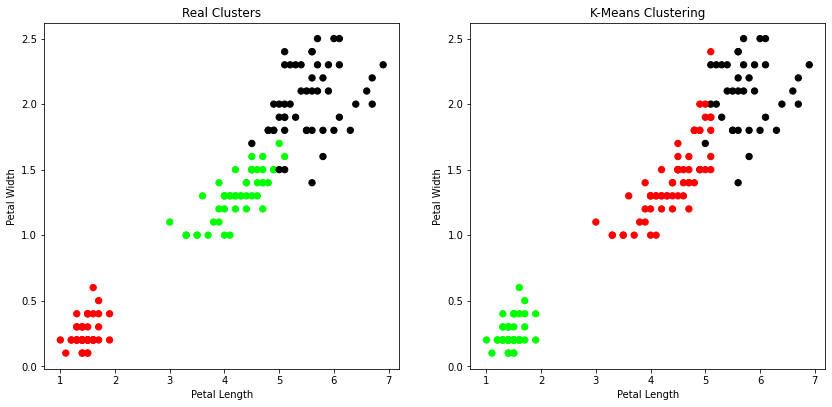

In [7]:
plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])


plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
model=KMeans(n_clusters=3)
model.fit(X)

plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


Text(0, 0.5, 'Petal Width')

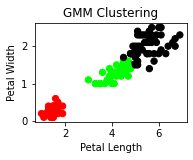

In [8]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[gmm_y],s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [10]:
print('Accuracy of K-Means Clustering')
print(sm.accuracy_score(y,model.labels_))
sm.confusion_matrix(y,model.labels_)

Accuracy of K-Means Clustering
0.24


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

In [11]:
print('Accuracy of GMM Clustering')
print(sm.accuracy_score(y,gmm_y))
sm.confusion_matrix(y,gmm_y)


Accuracy of GMM Clustering
0.9666666666666667


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]])